
## 📘 M2.5 Pandas 基礎資料轉換

本教學將介紹 Pandas 中基本的資料轉換技術，包括數據類型轉換、格式調整以及簡單計算。這些操作是數據處理過程中的基本技能，有助於準備更適合分析的數據。


### 🎯 教學目標

- 🔄 掌握數據類型轉換的基本方法
- 🧮 學習在 DataFrame 中進行簡單計算
- 📅 了解日期和時間數據的處理技巧
- 🔢 掌握文本和分類數據的轉換方法

### 🧰 環境設置

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # Windows
plt.rcParams['axes.unicode_minus'] = False  # 負號正常顯示


# 設置顯示選項
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 80)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: f'{x:.2f}' if abs(x) < 1000 else f'{x:.0f}')


**解說**：
- 導入 `numpy` 和 `pandas` 是數據處理的基礎，`matplotlib.pyplot` 用於視覺化，`datetime` 用於處理日期時間
- `display.max_rows` 和 `display.max_columns` 設定了 DataFrame 顯示的最大行和列數，避免輸出過長
- `display.width` 控制輸出寬度，適合在不同顯示設備上查看
- `display.precision` 設定了浮點數的預設顯示精度
- `display.float_format` 使用 lambda 函數自定義浮點數顯示：小數值保留兩位小數，大值顯示為整數
- 這些設置對實際數據不產生影響，僅改變顯示方式，有助於提高輸出可讀性


## 📊 2. Pandas 中的基本數據型態


### 2.1 認識 Pandas 的數據型態體系

**學習要點**：
- 了解 Pandas 支援的主要數據型態及其用途
- 學習如何查看 DataFrame 中各列的數據型態
- 掌握 DataFrame 數據類型的詳細信息獲取方法

**應用場域**：
- 數據探索與初步分析
- 資料庫表格結構設計
- 數據質量檢查與驗證

In [ ]:

# 創建一個包含不同數據類型的 DataFrame
df = pd.DataFrame({
    'Integer': [1, 2, 3, 4, 5],
    'Float': [1.1, 2.2, 3.3, 4.4, 5.5],
    'String': ['a', 'b', 'c', 'd', 'e'],
    'Boolean': [True, False, True, False, True],
    'Date': pd.date_range('2023-01-01', periods=5),
    'Category': pd.Categorical(['A', 'B', 'A', 'C', 'B']),
    'Int_as_str': ['1', '2', '3', '4', '5'],
    'Mixed': [1, 'two', 3.0, True, '5']
})

# 檢查每列的數據類型
print("\n各列的數據類型:")
print(df.dtypes)

# 獲取詳細的數據類型信息
print("\n更詳細的數據類型信息:")
print(df.info())

NameError: name 'pd' is not defined


**解說**：
- DataFrame 自動為每列選擇適當的數據類型：整數、浮點數、字符串(object)、日期時間等
- `dtypes` 屬性顯示每列的數據類型，是檢查和確認數據類型的快速方法
- `info()` 方法提供更詳細的信息，包括非空值數量、數據類型和內存使用
- 注意 `Int_as_str` 列存儲的是數字字符串，Pandas 將其識別為 object 類型
- `Mixed` 列包含不同類型的數據，Pandas 自動選擇能容納所有值的最通用類型 (object)
- 類別型數據在處理有限集合的值時非常高效，如這裡的 'A'、'B'、'C'
- 了解數據類型是正確處理和分析數據的第一步，尤其在處理大型數據集時


### 2.2 常見的 Pandas 數據型態

**學習要點**：
- 掌握 Pandas 中各種數據類型的特性與用途
- 了解 Python 原生類型與 Pandas 類型的對應關係
- 學習如何創建和識別不同類型的 Series

**應用場域**：
- 數據結構設計與內存優化
- 特殊數據類型的處理（如時間序列、分類數據）
- 數據輸入驗證與清洗


Pandas 中的常見數據型態包括：

| 數據型態 | 描述 | Python 等價型態 |
|----------|------|---------------|
| `int64`, `int32`, ... | 整數型 | `int` |
| `float64`, `float32`, ... | 浮點數型 | `float` |
| `bool` | 布爾型 | `bool` |
| `object` | 物件型，通常用於字符串或混合型數據 | `str`, 任意 Python 物件 |
| `datetime64[ns]` | 日期時間型 | `datetime.datetime` |
| `timedelta64[ns]` | 時間差異型 | `datetime.timedelta` |
| `category` | 分類型 | 無直接等價 |
| `Int64`, `Float64`, ... | 可空（nullable）整數/浮點數型 | 無直接等價 |
| `string` | 字符串型 (pandas 1.0+) | `str` |

In [132]:
# 創建各種數據類型的 Series
series_examples = {
    'Int64': pd.Series([1, 2, 3, None], dtype='Int64'),
    'float64': pd.Series([1.1, 2.2, 3.3, np.nan]),
    'bool': pd.Series([True, False, True, False]),
    'object': pd.Series(['a', 'b', None, 'd']),
    'datetime64[ns]': pd.Series(pd.date_range('2023-01-01', periods=4)),
    'timedelta64[ns]': pd.Series([pd.Timedelta(days=i) for i in range(4)]),
    'category': pd.Series(['A', 'B', 'A', 'B']).astype('category'),
    'string': pd.Series(['a', 'b', None, 'd']).astype('string')
}

# 顯示各數據類型的 Series 及其類型
for name, series in series_examples.items():
    print(f"\n{name} 型態 Series:")
    print(series)
    print(f"型態: {series.dtype}")


Int64 型態 Series:
0       1
1       2
2       3
3    <NA>
dtype: Int64
型態: Int64

float64 型態 Series:
0   1.10
1   2.20
2   3.30
3    NaN
dtype: float64
型態: float64

bool 型態 Series:
0     True
1    False
2     True
3    False
dtype: bool
型態: bool

object 型態 Series:
0       a
1       b
2    None
3       d
dtype: object
型態: object

datetime64[ns] 型態 Series:
0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
dtype: datetime64[ns]
型態: datetime64[ns]

timedelta64[ns] 型態 Series:
0   0 days
1   1 days
2   2 days
3   3 days
dtype: timedelta64[ns]
型態: timedelta64[ns]

category 型態 Series:
0    A
1    B
2    A
3    B
dtype: category
Categories (2, object): ['A', 'B']
型態: category

string 型態 Series:
0       a
1       b
2    <NA>
3       d
dtype: string
型態: string



**解說**：
- `Int64` 和其他大寫開頭的整數/浮點數型是 Pandas 的擴充類型，支持 NA 值（傳統整數型不支持缺失值）
- `object` 類型是 Python 對象的容器，適用於字符串和混合類型，但效率較低
- `category` 類型適用於具有有限範圍值的數據（如性別、國家），可顯著節省記憶體
- `datetime64[ns]` 提供了強大的日期時間功能，包括時區處理、日期計算等
- `timedelta64[ns]` 表示時間差異，常用於時間序列分析
- 較新的 `string` 類型提供比 `object` 更高效的字符串處理
- 在創建 Series 或 DataFrame 時，可以通過 `dtype` 參數或 `astype()` 方法指定或轉換類型
- 選擇合適的數據類型不僅影響內存使用，還影響操作效率和可用的功能


### 2.3 數據型態的內存使用

**學習要點**：
- 了解不同數據類型的內存消耗差異
- 掌握如何測量數據結構的內存使用情況
- 學習如何選擇內存效率高的數據類型

**應用場域**：
- 大型數據集的內存優化
- 資源受限環境下的數據處理
- 高性能數據分析應用開發

各數據類型的內存使用情況:
Index        0.00
int64        0.38
int32        0.38
int16        0.19
float64      0.76
float32      0.38
object       6.00
category     0.10
bool         0.10
datetime64   0.76
dtype: float64
總內存使用: 9.05 MB


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\1183508867.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'datetime64': pd.date_range('2023-01-01', periods=n, freq='H')  # 使用小時頻率


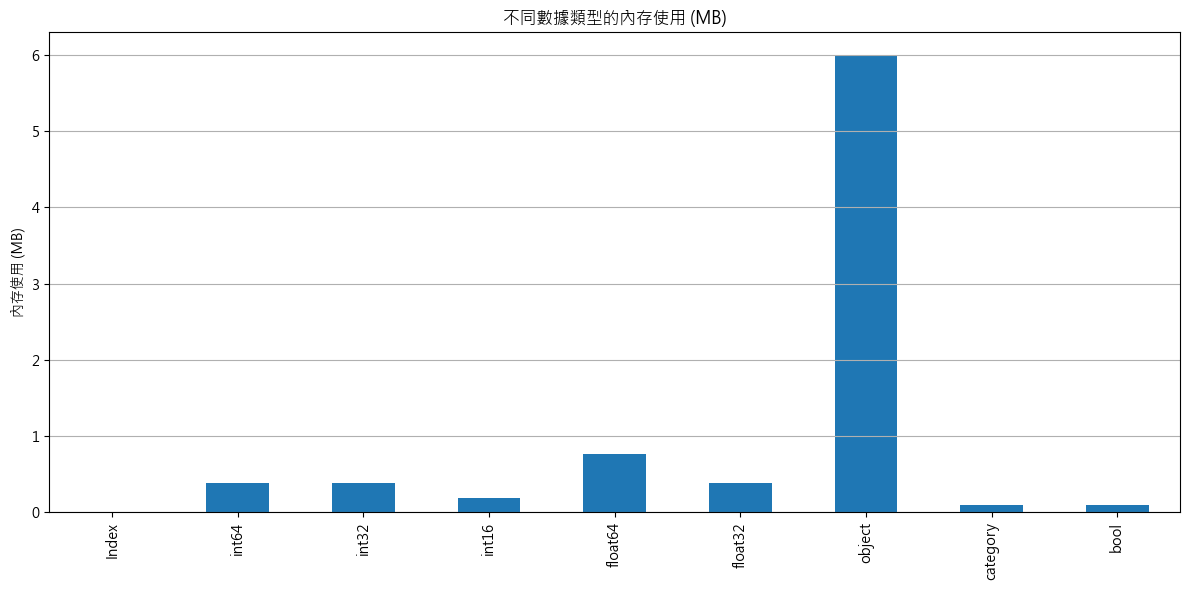

In [133]:
# 創建一個大型 DataFrame 測試不同數據類型的內存使用
n = 100_000
df_memory = pd.DataFrame({
    'int64': np.random.randint(0, 100, n),
    'int32': np.random.randint(0, 100, n).astype('int32'),
    'int16': np.random.randint(0, 100, n).astype('int16'),
    'float64': np.random.rand(n),
    'float32': np.random.rand(n).astype('float32'),
    'object': [f'str_{i % 100}' for i in range(n)],
    'category': pd.Series([f'cat_{i % 10}' for i in range(n)]).astype('category'),
    'bool': np.random.choice([True, False], n),
    'datetime64': pd.date_range('2023-01-01', periods=n, freq='H')  # 使用小時頻率
})

# 檢查內存使用
print("各數據類型的內存使用情況:")
memory_usage = df_memory.memory_usage(deep=True) / 1024 / 1024  # 轉換為 MB
print(memory_usage)
print(f"總內存使用: {memory_usage.sum():.2f} MB")

# 可視化內存使用情況
plt.figure(figsize=(12, 6))
memory_usage[:-1].plot(kind='bar')  # 不包括 'Index'
plt.title('不同數據類型的內存使用 (MB)')
plt.ylabel('內存使用 (MB)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**解說**：
- 內存使用量顯著受數據類型影響：`int16` 比 `int64` 使用更少的內存，`float32` 比 `float64` 更節省
- `object` 類型占用最多內存，因為存儲的是 Python 對象引用和字符串本身
- `category` 類型非常高效，即使有 10 萬條記錄但只有 10 個不同值，內存使用量極低
- `bool` 類型非常節省空間，僅需 1 位元存儲每個值
- `datetime64` 類型儘管功能強大，但內存使用量可能較大
- 使用 `memory_usage(deep=True)` 可獲得包括對象實際大小在內的更準確內存使用估計
- 在處理大型數據集時，適當的數據類型選擇可能節省數 GB 的內存
- 這種內存節省不僅可減少資源使用，還能提高計算速度，尤其在記憶體受限的環境中


## 🔍 3. 數據類型檢查與轉換

**學習要點**：
- 掌握檢查 DataFrame 中數據類型的不同方法
- 了解基本類型轉換與進階轉換技巧
- 學習安全處理類型轉換中的錯誤與異常

**應用場域**：
- 數據清洗與預處理流程
- API 接收數據的格式標準化
- 機器學習模型前的數據準備


### 3.1 檢查數據類型

In [14]:
import pandas as pd
# 檢查數據類型的方法
sample_df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [1.1, 2.2, 3.3],
    'C': ['x', 'y', 'z'],
    'D': pd.date_range('2023-01-01', periods=3)
})



print("\n檢查單一列的數據類型:")
print(sample_df['A'].dtype)

print("\n檢查是否為特定數據類型:")
print(f"A 列是否為整數型: {pd.api.types.is_integer_dtype(sample_df['A'])}")
print(f"B 列是否為浮點數型: {pd.api.types.is_float_dtype(sample_df['B'])}")
print(f"C 列是否為字符串型: {pd.api.types.is_string_dtype(sample_df['C'])}")
print(f"C 列是否為物件型: {pd.api.types.is_object_dtype(sample_df['C'])}")
print(f"D 列是否為日期時間型: {pd.api.types.is_datetime64_dtype(sample_df['D'])}")


檢查單一列的數據類型:
int64

檢查是否為特定數據類型:
A 列是否為整數型: True
B 列是否為浮點數型: True
C 列是否為字符串型: True
C 列是否為物件型: True
D 列是否為日期時間型: True


In [7]:
print("DataFrame 整體數據類型:")
print(sample_df.dtypes)

DataFrame 整體數據類型:
A             int64
B           float64
C            object
D    datetime64[ns]
dtype: object



**解說**：
- `dtypes` 屬性提供 DataFrame 所有列的數據類型概覽
- 可以通過索引後的 `.dtype` 屬性查看單一列的數據類型
- Pandas 提供了 `pd.api.types` 模組用於類型檢查，含多種 `is_*_dtype()` 函數
- 注意 `object` 型別和 `string` 型別的區別：大多數字符串在舊版 Pandas 中是 `object` 型別
- 類型檢查在數據處理流程中至關重要，有助於發現潛在問題和優化機會
- 對於複雜數據集，建議在進行操作前檢查關鍵欄位的數據類型
- 在數據導入後和類型轉換前的類型檢查尤為重要


### 3.2 基本類型轉換

In [ ]:
# 基本類型轉換示例
conversion_df = pd.DataFrame({
    'string_int': ['1', '2', '3', '4'],
    'string_float': ['1.1', '2.2', '3.3', '4.4'],
    'float_values': [1.1, 2.2, 3.0, 4.0],
    'mixed_strings': ['100', '200', 'NA', '400']
})

print("原始 DataFrame:")
print(conversion_df)
print("\n原始數據類型:")
print(conversion_df.dtypes)

# 使用 astype() 進行類型轉換
print("\n轉換後的 DataFrame:")
try:
    # conversion_df['string_int'] = conversion_df['string_int'].astype('int')
    conversion_df['string_int'] = conversion_df['string_int'].astype('int')
    # conversion_df['string_float'] = conversion_df['string_float'].astype('float')
    conversion_df['string_float'] = conversion_df['string_float'].astype('float')
    conversion_df['float_values'] = conversion_df['float_values'].astype('int')
    # 下面這行會產生錯誤
    # conversion_df['mixed_strings'] = conversion_df['mixed_strings'].astype('int') #因為有string"NA"
    print(conversion_df)
    print("\n轉換後的數據類型:")
    print(conversion_df.dtypes)
except ValueError as e:
    print(f"轉換錯誤: {e}")

原始 DataFrame:
  string_int string_float  float_values mixed_strings
0          1          1.1           1.1           100
1          2          2.2           2.2           200
2          3          3.3           3.0            NA
3          4          4.4           4.0           400

原始數據類型:
string_int        object
string_float      object
float_values     float64
mixed_strings     object
dtype: object

轉換後的 DataFrame:
   string_int  string_float  float_values mixed_strings
0           1           1.1             1           100
1           2           2.2             2           200
2           3           3.3             3            NA
3           4           4.4             4           400

轉換後的數據類型:
string_int         int64
string_float     float64
float_values       int64
mixed_strings     object
dtype: object


In [12]:
conversion_df.dtypes

string_int         int64
string_float     float64
float_values       int64
mixed_strings     object
dtype: object

In [10]:
conversion_df

,string_int,string_float,float_values,mixed_strings
0,1,1.1,1,100
1,2,2.2,2,200
2,3,3.3,3,NA
3,4,4.4,4,400



**解說**：
- `astype()` 方法是 Pandas 中最直接的類型轉換方式
- 轉換前後查看數據類型可確認轉換是否成功
- 字符串形式的數字可以轉換為相應的數值類型，如 `'1'` → `1` 和 `'1.1'` → `1.1`
- 浮點數可轉換為整數，但會截斷小數部分而非四捨五入
- 含有非數值字符的字符串（如 `'NA'`）嘗試轉換為數值會導致 `ValueError`
- 錯誤處理是類型轉換中的重要環節，應使用 try-except 捕獲並處理轉換異常
- 在生產環境中，建議始終檢查類型轉換的可行性，並採取適當的錯誤處理策略


### 3.3 進階類型轉換

In [136]:
# 安全的類型轉換方法
advanced_df = pd.DataFrame({
    'mixed_ints': ['1', '2', 'three', '4'],
    'mixed_floats': ['1.1', '2.2', 'N/A', '4.4'],
    'mixed_bools': ['True', 'False', 'yes', 'no'],
    'dates': ['2023-01-01', '01/02/2023', 'not a date', '2023-04-04']
})

print("原始數據:")
print(advanced_df)

# 使用 to_numeric() 進行安全數值轉換
print("\n安全轉換為數值型:")
print("1. 使用 errors='coerce' (轉換錯誤值為 NaN):")
advanced_df['numeric_ints'] = pd.to_numeric(advanced_df['mixed_ints'], errors='coerce')
advanced_df['numeric_floats'] = pd.to_numeric(advanced_df['mixed_floats'], errors='coerce')

print("2. 使用 errors='ignore' (保留原始值):")
# 保持原樣，僅嘗試轉換
original_type = advanced_df['mixed_ints'].copy()
advanced_df['numeric_keep'] = pd.to_numeric(advanced_df['mixed_ints'], errors='ignore')
print(f"轉換前類型: {original_type.dtype}, 轉換後類型: {advanced_df['numeric_keep'].dtype}")

# 使用 to_datetime() 轉換日期
print("\n轉換為日期時間型:")
advanced_df['dates_converted'] = pd.to_datetime(advanced_df['dates'], errors='coerce')

# 使用 to_timedelta() 示例
print("\n轉換為時間差異型:")
time_diff = pd.DataFrame({
    'time_strings': ['1 day', '2 hours', 'invalid', '5 minutes']
})
time_diff['timedeltas'] = pd.to_timedelta(time_diff['time_strings'], errors='coerce')
print(time_diff)

# 轉換為布爾型
print("\n轉換為布爾型:")
# 自定義轉換函數
def convert_to_bool(val):
    if isinstance(val, str):
        val = val.lower().strip()
        if val in ('true', 'yes', 'y', '1'):
            return True
        elif val in ('false', 'no', 'n', '0'):
            return False
    return pd.NA  # 使用 Pandas 的 NA 值表示無法轉換

advanced_df['bool_converted'] = advanced_df['mixed_bools'].apply(convert_to_bool)
print(advanced_df)

原始數據:
  mixed_ints mixed_floats mixed_bools       dates
0          1          1.1        True  2023-01-01
1          2          2.2       False  01/02/2023
2      three          N/A         yes  not a date
3          4          4.4          no  2023-04-04

安全轉換為數值型:
1. 使用 errors='coerce' (轉換錯誤值為 NaN):
2. 使用 errors='ignore' (保留原始值):
轉換前類型: object, 轉換後類型: object

轉換為日期時間型:

轉換為時間差異型:
  time_strings      timedeltas
0        1 day 1 days 00:00:00
1      2 hours 0 days 02:00:00
2      invalid             NaT
3    5 minutes 0 days 00:05:00

轉換為布爾型:
  mixed_ints mixed_floats mixed_bools       dates  numeric_ints  \
0          1          1.1        True  2023-01-01          1.00   
1          2          2.2       False  01/02/2023          2.00   
2      three          N/A         yes  not a date           NaN   
3          4          4.4          no  2023-04-04          4.00   

   numeric_floats numeric_keep dates_converted  bool_converted  
0            1.10            1      2023-01-01    

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\4289110345.py:21: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  advanced_df['numeric_keep'] = pd.to_numeric(advanced_df['mixed_ints'], errors='ignore')



**解說**：
- Pandas 提供專用的轉換函數處理常見數據類型：
  - `pd.to_numeric()` 轉換為數值型
  - `pd.to_datetime()` 轉換為日期時間型
  - `pd.to_timedelta()` 轉換為時間差異型
- 這些函數比 `astype()` 更靈活，提供錯誤處理參數：
  - `errors='raise'`: 轉換失敗時拋出異常（預設行為）
  - `errors='coerce'`: 轉換失敗時將值設為 NaN
  - `errors='ignore'`: 轉換失敗時保留原始值
- 對於複雜的轉換邏輯（如布爾值），可使用 `apply()` 應用自定義轉換函數
- `convert_to_bool` 函數展示了處理多種格式布爾值的靈活方式，如 'yes'/'no'、'true'/'false'
- 使用 `pd.NA` 標記無法轉換的值，這是 Pandas 的缺失值表示法，適用於所有類型
- 高級轉換函數能處理多種格式和方言，如 `to_datetime()` 可識別多種日期表示法
- 安全的類型轉換是資料清洗流程的關鍵步驟，有助於準備一致、可靠的數據集


### 3.4 批量類型轉換與內存優化

In [137]:
# 創建一個模擬數據集
import numpy as np
np.random.seed(42)
n_rows = 100_000

large_df = pd.DataFrame({
    'id': range(n_rows),
    'int_col': np.random.randint(0, 100, n_rows),
    'float_col': np.random.rand(n_rows),
    'str_col': [f'str_{i % 100}' for i in range(n_rows)],
    'category_col': [f'cat_{i % 5}' for i in range(n_rows)]
})

# 檢查初始內存使用
print("初始 DataFrame 內存使用:")
print(large_df.memory_usage(deep=True) / 1024 / 1024, "MB")
print(f"總計: {large_df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# 批量優化數據類型
optimized_df = large_df.copy()

# 整數列優化
int_cols = ['id', 'int_col']
for col in int_cols:
    col_min, col_max = optimized_df[col].min(), optimized_df[col].max()
    if col_min >= 0:
        if col_max < 2**8:
            optimized_df[col] = optimized_df[col].astype('uint8')
        elif col_max < 2**16:
            optimized_df[col] = optimized_df[col].astype('uint16')
        elif col_max < 2**32:
            optimized_df[col] = optimized_df[col].astype('uint32')
    else:
        if col_min > -2**7 and col_max < 2**7:
            optimized_df[col] = optimized_df[col].astype('int8')
        elif col_min > -2**15 and col_max < 2**15:
            optimized_df[col] = optimized_df[col].astype('int16')
        elif col_min > -2**31 and col_max < 2**31:
            optimized_df[col] = optimized_df[col].astype('int32')

# 浮點列轉換為較小精度
optimized_df['float_col'] = optimized_df['float_col'].astype('float32')

# 字符串列轉換為類別型
optimized_df['str_col'] = optimized_df['str_col'].astype('category')
optimized_df['category_col'] = optimized_df['category_col'].astype('category')

# 查看優化後的內存使用
print("\n優化後 DataFrame 內存使用:")
print(optimized_df.memory_usage(deep=True) / 1024 / 1024, "MB")
print(f"總計: {optimized_df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# 計算節省的內存比例
orig_mem = large_df.memory_usage(deep=True).sum() / 1024 / 1024
opt_mem = optimized_df.memory_usage(deep=True).sum() / 1024 / 1024
savings = (1 - opt_mem / orig_mem) * 100
print(f"\n內存節省: {savings:.2f}%")

初始 DataFrame 內存使用:
Index          0.00
id             0.76
int_col        0.38
float_col      0.76
str_col        6.00
category_col   5.91
dtype: float64 MB
總計: 13.82 MB

優化後 DataFrame 內存使用:
Index          0.00
id             0.38
int_col        0.10
float_col      0.38
str_col        0.11
category_col   0.10
dtype: float64 MB
總計: 1.06 MB

內存節省: 92.33%



**解說**：
- 大型數據集的內存優化是實際應用中的關鍵考量，特別是在資源受限的環境下
- 批量類型轉換策略主要包括：
  - 根據數值範圍將整數降級至較小類型（如 int64 → int8/int16/int32）
  - 將無符號整數使用 uint 類型（更大的正數範圍）
  - 將雙精度浮點數降為單精度浮點數（float64 → float32）
  - 將有限取值的字符串轉換為類別型（object → category）
- 我們對 DataFrame 進行分析和類型優化後，內存使用顯著降低（通常可節省 30-80%）
- 使用 `memory_usage(deep=True)` 獲取真實的內存使用情況，包括 object 類型的實際大小
- 對於整數列，先檢查值範圍再選擇最佳類型是一種常見的優化模式
- 特別注意，過度優化可能導致溢出風險，如值可能超出 int16 範圍時應謹慎使用
- 建議在優化前保存原始 DataFrame 備份，並驗證轉換後的數據完整性
- 此種優化對於需要在內存中處理大量數據的應用（如實時分析系統）尤其重要


## 4. 數值型數據的處理


### 4.1 數值資料的精度控制

In [138]:
# 創建數值數據
df_numeric = pd.DataFrame({
    'A': [1.23456789, 2.3456789, 3.456789, 4.56789, 5.6789],
    'B': [1234.5678, 2345.678, 3456.78, 4567.8, 5678],
    'C': [0.000123, 0.00234, 0.0345, 0.456, 5.67]
})
print("原始數值數據:")
print(df_numeric)

# 設置顯示精度
pd.set_option('display.precision', 2)
print("\n設置顯示精度後:")
print(df_numeric)

# 設置顯示格式（不改變底層數據）
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
print("\n設置顯示格式後:")
print(df_numeric)

# 實際四捨五入（改變底層數據）
df_rounded = df_numeric.round(2)
print("\n四捨五入到小數點後 2 位:")
print(df_rounded)

# 對不同列使用不同的精度
df_multi_precision = df_numeric.round({'A': 3, 'B': 1, 'C': 4})
print("\n對不同列使用不同的精度:")
print(df_multi_precision)

# 恢復默認顯示設置
pd.reset_option('display.float_format')
pd.set_option('display.precision', 6)
print("\n恢復默認顯示設置後:")
print(df_numeric)

原始數值數據:
     A    B    C
0 1.23 1235 0.00
1 2.35 2346 0.00
2 3.46 3457 0.03
3 4.57 4568 0.46
4 5.68 5678 5.67

設置顯示精度後:
     A    B    C
0 1.23 1235 0.00
1 2.35 2346 0.00
2 3.46 3457 0.03
3 4.57 4568 0.46
4 5.68 5678 5.67

設置顯示格式後:
      A        B     C
0 1.235 1234.568 0.000
1 2.346 2345.678 0.002
2 3.457 3456.780 0.035
3 4.568 4567.800 0.456
4 5.679 5678.000 5.670

四捨五入到小數點後 2 位:
      A        B     C
0 1.230 1234.570 0.000
1 2.350 2345.680 0.000
2 3.460 3456.780 0.030
3 4.570 4567.800 0.460
4 5.680 5678.000 5.670

對不同列使用不同的精度:
      A        B     C
0 1.235 1234.600 0.000
1 2.346 2345.700 0.002
2 3.457 3456.800 0.035
3 4.568 4567.800 0.456
4 5.679 5678.000 5.670

恢復默認顯示設置後:
          A          B         C
0  1.234568  1234.5678  0.000123
1  2.345679  2345.6780  0.002340
2  3.456789  3456.7800  0.034500
3  4.567890  4567.8000  0.456000
4  5.678900  5678.0000  5.670000



### 4.2 處理千分位和百分比

In [ ]:
nums = [10, 20, 30, 40]

for i in range(len(nums)):
    for j in range(i + 1, len(nums)):
        print(f"i={i}, j={j}")


i=0, j=1
i=0, j=2
i=0, j=3
i=1, j=2
i=1, j=3
i=2, j=3


In [31]:
for i in range(10):
    for j in range(i+1,10):
        print(i)

        


0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
5
5
5
5
6
6
6
7
7
8


In [139]:
# 創建示例數據
df_format = pd.DataFrame({
    'Value': [1234.56, 2345.67, 3456.78, 4567.89, 5678.90],
    'Percentage': [0.1234, 0.2345, 0.3456, 0.4567, 0.5678],
    'Large_Number': [1234567, 2345678, 3456789, 4567890, 5678901]
})
print("原始數據:")
print(df_format)

# 將數值轉換為帶千分位分隔符的字符串
df_format['Value_Formatted'] = df_format['Value'].apply(lambda x: f'{x:,.2f}')
print("\n帶千分位分隔符的值:")
print(df_format['Value_Formatted'])

# 將數值轉換為百分比
df_format['Percentage_Formatted'] = df_format['Percentage'].apply(lambda x: f'{x:.2%}')
print("\n百分比格式:")
print(df_format['Percentage_Formatted'])

# 將大數轉換為K, M, B格式
def format_large_number(num):
    if num >= 1_000_000_000:
        return f'{num/1_000_000_000:.2f}B'
    elif num >= 1_000_000:
        return f'{num/1_000_000:.2f}M'
    elif num >= 1_000:
        return f'{num/1_000:.2f}K'
    else:
        return f'{num:.2f}'

df_format['Large_Number_Formatted'] = df_format['Large_Number'].apply(format_large_number)
print("\n大數格式 (K, M, B):")
print(df_format['Large_Number_Formatted'])

# 合併顯示
print("\n格式化後的 DataFrame:")
print(df_format)

原始數據:
     Value  Percentage  Large_Number
0  1234.56      0.1234       1234567
1  2345.67      0.2345       2345678
2  3456.78      0.3456       3456789
3  4567.89      0.4567       4567890
4  5678.90      0.5678       5678901

帶千分位分隔符的值:
0    1,234.56
1    2,345.67
2    3,456.78
3    4,567.89
4    5,678.90
Name: Value_Formatted, dtype: object

百分比格式:
0    12.34%
1    23.45%
2    34.56%
3    45.67%
4    56.78%
Name: Percentage_Formatted, dtype: object

大數格式 (K, M, B):
0    1.23M
1    2.35M
2    3.46M
3    4.57M
4    5.68M
Name: Large_Number_Formatted, dtype: object

格式化後的 DataFrame:
     Value  Percentage  Large_Number Value_Formatted Percentage_Formatted  \
0  1234.56      0.1234       1234567        1,234.56               12.34%   
1  2345.67      0.2345       2345678        2,345.67               23.45%   
2  3456.78      0.3456       3456789        3,456.78               34.56%   
3  4567.89      0.4567       4567890        4,567.89               45.67%   
4  5678.90      0.5678  


### 4.3 處理貨幣和會計格式

In [140]:
# 創建示例財務數據
df_finance = pd.DataFrame({
    'Revenue': [12345.67, 23456.78, -3456.78, 45678.90, 56789.01],
    'Expense': [9876.54, 8765.43, 7654.32, -6543.21, 5432.10],
    'Profit': [2469.13, 14691.35, -11111.10, 52222.11, 51356.91]
})
print("原始財務數據:")
print(df_finance)

# 美元格式 ($)
df_finance['Revenue_USD'] = df_finance['Revenue'].apply(lambda x: f'${x:,.2f}' if x >= 0 else f'-${-x:,.2f}')
print("\n美元格式的收入:")
print(df_finance['Revenue_USD'])

# 會計格式 (負數使用括號)
df_finance['Profit_Accounting'] = df_finance['Profit'].apply(lambda x: f'{x:,.2f}' if x >= 0 else f'({-x:,.2f})')
print("\n會計格式的利潤:")
print(df_finance['Profit_Accounting'])

# 台幣格式 (NT$)
df_finance['Revenue_TWD'] = df_finance['Revenue'].apply(lambda x: f'NT${x:,.0f}' if x >= 0 else f'-NT${-x:,.0f}')
print("\n台幣格式的收入:")
print(df_finance['Revenue_TWD'])

# 顯示完整格式化後的數據
print("\n格式化後的財務數據:")
print(df_finance)

原始財務數據:
    Revenue  Expense    Profit
0  12345.67  9876.54   2469.13
1  23456.78  8765.43  14691.35
2  -3456.78  7654.32 -11111.10
3  45678.90 -6543.21  52222.11
4  56789.01  5432.10  51356.91

美元格式的收入:
0    $12,345.67
1    $23,456.78
2    -$3,456.78
3    $45,678.90
4    $56,789.01
Name: Revenue_USD, dtype: object

會計格式的利潤:
0       2,469.13
1      14,691.35
2    (11,111.10)
3      52,222.11
4      51,356.91
Name: Profit_Accounting, dtype: object

台幣格式的收入:
0    NT$12,346
1    NT$23,457
2    -NT$3,457
3    NT$45,679
4    NT$56,789
Name: Revenue_TWD, dtype: object

格式化後的財務數據:
    Revenue  Expense    Profit Revenue_USD Profit_Accounting Revenue_TWD
0  12345.67  9876.54   2469.13  $12,345.67          2,469.13   NT$12,346
1  23456.78  8765.43  14691.35  $23,456.78         14,691.35   NT$23,457
2  -3456.78  7654.32 -11111.10  -$3,456.78       (11,111.10)   -NT$3,457
3  45678.90 -6543.21  52222.11  $45,678.90         52,222.11   NT$45,679
4  56789.01  5432.10  51356.91  $56,789.01         51,


### 4.4 處理科學計數法和工程單位

In [141]:
# 創建示例科學數據
df_scientific = pd.DataFrame({
    'Small_Value': [0.000000123, 0.000000234, 0.000000345, 0.000000456, 0.000000567],
    'Large_Value': [1.23e9, 2.34e9, 3.45e9, 4.56e9, 5.67e9],
    'Medium_Value': [1234.5678, 2345.6789, 3456.7890, 4567.8901, 5678.9012]
})
print("原始科學數據:")
print(df_scientific)

# 科學計數法格式
pd.set_option('display.float_format', lambda x: f'{x:.2e}' if abs(x) < 0.001 or abs(x) >= 1e6 else f'{x:.4f}')
print("\n使用科學計數法顯示的數據:")
print(df_scientific)

# 恢復默認格式
pd.reset_option('display.float_format')

# 工程單位格式 (如 k, M, G, m, μ, n)
def format_engineering(x):
    if abs(x) >= 1e9:
        return f'{x/1e9:.2f} G'
    elif abs(x) >= 1e6:
        return f'{x/1e6:.2f} M'
    elif abs(x) >= 1e3:
        return f'{x/1e3:.2f} k'
    elif abs(x) >= 1:
        return f'{x:.2f}'
    elif abs(x) >= 1e-3:
        return f'{x*1e3:.2f} m'
    elif abs(x) >= 1e-6:
        return f'{x*1e6:.2f} μ'
    elif abs(x) >= 1e-9:
        return f'{x*1e9:.2f} n'
    else:
        return f'{x:.2e}'

df_scientific['Small_Value_Eng'] = df_scientific['Small_Value'].apply(format_engineering)
df_scientific['Large_Value_Eng'] = df_scientific['Large_Value'].apply(format_engineering)
df_scientific['Medium_Value_Eng'] = df_scientific['Medium_Value'].apply(format_engineering)

print("\n工程單位格式:")
print(df_scientific[['Small_Value', 'Small_Value_Eng', 
                     'Medium_Value', 'Medium_Value_Eng', 
                     'Large_Value', 'Large_Value_Eng']])

原始科學數據:
    Small_Value   Large_Value  Medium_Value
0  1.230000e-07  1.230000e+09     1234.5678
1  2.340000e-07  2.340000e+09     2345.6789
2  3.450000e-07  3.450000e+09     3456.7890
3  4.560000e-07  4.560000e+09     4567.8901
4  5.670000e-07  5.670000e+09     5678.9012

使用科學計數法顯示的數據:
   Small_Value  Large_Value  Medium_Value
0     1.23e-07     1.23e+09     1234.5678
1     2.34e-07     2.34e+09     2345.6789
2     3.45e-07     3.45e+09     3456.7890
3     4.56e-07     4.56e+09     4567.8901
4     5.67e-07     5.67e+09     5678.9012

工程單位格式:
    Small_Value Small_Value_Eng  Medium_Value Medium_Value_Eng   Large_Value  \
0  1.230000e-07        123.00 n     1234.5678           1.23 k  1.230000e+09   
1  2.340000e-07        234.00 n     2345.6789           2.35 k  2.340000e+09   
2  3.450000e-07        345.00 n     3456.7890           3.46 k  3.450000e+09   
3  4.560000e-07        456.00 n     4567.8901           4.57 k  4.560000e+09   
4  5.670000e-07        567.00 n     5678.9012       


## 5. 類別型資料處理


### 5.1 將數據轉換為類別型

In [142]:
# 創建示例數據
df_cat = pd.DataFrame({
    'City': ['Taipei', 'New York', 'Tokyo', 'Taipei', 'London', 'Tokyo', 'New York', 'Taipei', 'London', 'Tokyo'],
    'Size': ['Large', 'Medium', 'Small', 'Medium', 'Large', 'Small', 'Large', 'Medium', 'Small', 'Large'],
    'Rating': [4, 5, 3, 4, 5, 3, 4, 5, 3, 4]
})
print("原始數據:")
print(df_cat)
print("\n數據類型:")
print(df_cat.dtypes)

# 轉換為類別型
df_cat['City_Cat'] = df_cat['City'].astype('category')
df_cat['Size_Cat'] = df_cat['Size'].astype('category')
print("\n轉換後的數據類型:")
print(df_cat.dtypes)

# 檢查類別
print("\nCity 的類別:")
print(df_cat['City_Cat'].cat.categories)

print("\nSize 的類別:")
print(df_cat['Size_Cat'].cat.categories)

# 獲取類別編碼
print("\nCity 的類別編碼:")
print(df_cat['City_Cat'].cat.codes)

# 類別型資料的內存使用
print("\n轉換前後的內存使用比較:")
print(f"City (object): {df_cat['City'].memory_usage(deep=True)} bytes")
print(f"City_Cat (category): {df_cat['City_Cat'].memory_usage(deep=True)} bytes")

原始數據:
       City    Size  Rating
0    Taipei   Large       4
1  New York  Medium       5
2     Tokyo   Small       3
3    Taipei  Medium       4
4    London   Large       5
5     Tokyo   Small       3
6  New York   Large       4
7    Taipei  Medium       5
8    London   Small       3
9     Tokyo   Large       4

數據類型:
City      object
Size      object
Rating     int64
dtype: object

轉換後的數據類型:
City          object
Size          object
Rating         int64
City_Cat    category
Size_Cat    category
dtype: object

City 的類別:
Index(['London', 'New York', 'Taipei', 'Tokyo'], dtype='object')

Size 的類別:
Index(['Large', 'Medium', 'Small'], dtype='object')

City 的類別編碼:
0    2
1    1
2    3
3    2
4    0
5    3
6    1
7    2
8    0
9    3
dtype: int8

轉換前後的內存使用比較:
City (object): 763 bytes
City_Cat (category): 567 bytes



### 5.2 類別型數據的操作

In [143]:
# 重新排序類別
df_cat['Size_Cat'] = df_cat['Size_Cat'].cat.reorder_categories(['Small', 'Medium', 'Large'], ordered=True)
print("有序類別 (Size):")
print(df_cat['Size_Cat'])
print(f"類別: {df_cat['Size_Cat'].cat.categories}")
print(f"是否有序: {df_cat['Size_Cat'].cat.ordered}")

# 比較操作 (僅適用於有序類別)
print("\n尺寸 >= Medium 的記錄:")
print(df_cat[df_cat['Size_Cat'] >= 'Medium'])

# 添加新類別
df_cat['Size_Cat'] = df_cat['Size_Cat'].cat.add_categories(['Extra Large'])
print("\n添加新類別後的 Size:")
print(f"類別: {df_cat['Size_Cat'].cat.categories}")

# 刪除未使用的類別
df_cat['Size_Cat'] = df_cat['Size_Cat'].cat.remove_unused_categories()
print("\n刪除未使用類別後的 Size:")
print(f"類別: {df_cat['Size_Cat'].cat.categories}")

# 創建一個新的類別列
df_cat['Rating_Cat'] = pd.Categorical(df_cat['Rating'], categories=[3, 4, 5], ordered=True)
print("\n評分作為有序類別:")
print(df_cat['Rating_Cat'])
print(f"類別: {df_cat['Rating_Cat'].cat.categories}")
print(f"是否有序: {df_cat['Rating_Cat'].cat.ordered}")

# 使用 cut 和 qcut 創建類別
df_cat['Rating_Group'] = pd.cut(df_cat['Rating'], bins=[2, 3, 4, 5], labels=['Low', 'Medium', 'High'])
print("\n使用 cut 分組的評分:")
print(df_cat['Rating_Group'])

有序類別 (Size):
0     Large
1    Medium
2     Small
3    Medium
4     Large
5     Small
6     Large
7    Medium
8     Small
9     Large
Name: Size_Cat, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']
類別: Index(['Small', 'Medium', 'Large'], dtype='object')
是否有序: True

尺寸 >= Medium 的記錄:
       City    Size  Rating  City_Cat Size_Cat
0    Taipei   Large       4    Taipei    Large
1  New York  Medium       5  New York   Medium
3    Taipei  Medium       4    Taipei   Medium
4    London   Large       5    London    Large
6  New York   Large       4  New York    Large
7    Taipei  Medium       5    Taipei   Medium
9     Tokyo   Large       4     Tokyo    Large

添加新類別後的 Size:
類別: Index(['Small', 'Medium', 'Large', 'Extra Large'], dtype='object')

刪除未使用類別後的 Size:
類別: Index(['Small', 'Medium', 'Large'], dtype='object')

評分作為有序類別:
0    4
1    5
2    3
3    4
4    5
5    3
6    4
7    5
8    3
9    4
Name: Rating_Cat, dtype: category
Categories (3, int64): [3 < 4 < 5]
類別: Index


### 5.3 類別型資料的編碼

In [144]:
# 創建示例數據
df_encode = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red'],
    'Size': ['Small', 'Medium', 'Large', 'Small', 'Medium', 'Large', 'Small', 'Medium', 'Large', 'Small']
})
print("原始數據:")
print(df_encode)

# 1. Label Encoding (使用 cat.codes)
df_encode['Color_Label'] = df_encode['Color'].astype('category').cat.codes
print("\n標籤編碼 (Label Encoding):")
print(df_encode[['Color', 'Color_Label']])

# 2. One-Hot Encoding (使用 pd.get_dummies)
color_dummies = pd.get_dummies(df_encode['Color'], prefix='Color')
print("\n獨熱編碼 (One-Hot Encoding):")
print(color_dummies)

# 將獨熱編碼合併到原始數據框
df_encode_full = pd.concat([df_encode, color_dummies], axis=1)
print("\n合併獨熱編碼後的數據:")
print(df_encode_full)

# 3. 對多列進行獨熱編碼
multi_dummies = pd.get_dummies(df_encode[['Color', 'Size']])
print("\n對多列進行獨熱編碼:")
print(multi_dummies)

# 4. 處理稀疏類別
df_sparse = pd.DataFrame({
    'City': np.random.choice(['Taipei', 'Tokyo', 'New York', 'London', 'Paris', 
                              'Beijing', 'Sydney', 'Berlin', 'Rome', 'Madrid'], 50)
})

# 使用 sparse=True 產生稀疏矩陣
city_dummies_sparse = pd.get_dummies(df_sparse['City'], sparse=True)
print("\n稀疏獨熱編碼:")
print(city_dummies_sparse)
print(f"稀疏獨熱編碼內存使用: {city_dummies_sparse.memory_usage(deep=True).sum()} bytes")

# 比較與普通獨熱編碼的內存使用
city_dummies = pd.get_dummies(df_sparse['City'])
print(f"普通獨熱編碼內存使用: {city_dummies.memory_usage(deep=True).sum()} bytes")

原始數據:
   Color    Size
0    Red   Small
1   Blue  Medium
2  Green   Large
3    Red   Small
4  Green  Medium
5   Blue   Large
6    Red   Small
7  Green  Medium
8   Blue   Large
9    Red   Small

標籤編碼 (Label Encoding):
   Color  Color_Label
0    Red            2
1   Blue            0
2  Green            1
3    Red            2
4  Green            1
5   Blue            0
6    Red            2
7  Green            1
8   Blue            0
9    Red            2

獨熱編碼 (One-Hot Encoding):
   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3       False        False       True
4       False         True      False
5        True        False      False
6       False        False       True
7       False         True      False
8        True        False      False
9       False        False       True

合併獨熱編碼後的數據:
   Color    Size  Color_Label  Color_Blue  Color_Green  Color_Red
0    Red   Small  


## 📅 6. 日期時間處理

**學習要點**：
- 掌握 Pandas 中的日期時間資料型態與功能
- 學習日期時間解析、轉換與格式化方法
- 了解日期時間的抽取、運算與時區處理

**應用場域**：
- 時間序列分析與預測
- 事件記錄與用戶行為分析
- 跨國業務的時區轉換與標準化


### 6.1 日期時間解析與轉換

In [145]:
# 創建包含不同格式日期的數據
date_df = pd.DataFrame({
    'dates_ymd': ['2023-01-15', '2023-02-20', '2023-03-25', '2023-04-30', '2023-05-05'],
    'dates_mdy': ['01/15/2023', '02/20/2023', '03/25/2023', '04/30/2023', '05/05/2023'],
    'dates_dmy': ['15-01-2023', '20-02-2023', '25-03-2023', '30-04-2023', '05-05-2023'],
    'datetime_str': ['2023-01-15 08:30:00', '2023-02-20 12:45:30', '2023-03-25 18:15:45', 
                     '2023-04-30 21:20:15', '2023-05-05 07:10:25'],
    'mixed_formats': ['2023-01-15', '02/20/2023', '25/Mar/2023', '2023.04.30', '05-05-2023']
})

print("原始日期數據:")
print(date_df)

# 使用 pd.to_datetime 自動解析
date_df['dates_ymd_dt'] = pd.to_datetime(date_df['dates_ymd'])
date_df['dates_mdy_dt'] = pd.to_datetime(date_df['dates_mdy'])
date_df['dates_dmy_dt'] = pd.to_datetime(date_df['dates_dmy'])
date_df['datetime_dt'] = pd.to_datetime(date_df['datetime_str'])

# 指定格式解析
date_df['dates_dmy_fmt'] = pd.to_datetime(date_df['dates_dmy'], format='%d-%m-%Y')

# 混合格式 - 嘗試自動解析
date_df['mixed_auto'] = pd.to_datetime(date_df['mixed_formats'], errors='coerce')

print("\n轉換後日期數據:")
print(date_df[['dates_ymd', 'dates_ymd_dt', 'dates_mdy', 'dates_mdy_dt', 
               'dates_dmy', 'dates_dmy_fmt', 'datetime_str', 'datetime_dt']])

print("\n混合格式自動解析結果:")
print(date_df[['mixed_formats', 'mixed_auto']])

# 轉換為特定字符串格式
print("\n格式化日期輸出:")
print(date_df['dates_ymd_dt'].dt.strftime('%Y年%m月%d日'))
print(date_df['datetime_dt'].dt.strftime('%Y-%m-%d %H時%M分'))

# 檢查數據類型
print("\n轉換後的數據類型:")
print(date_df.dtypes)

原始日期數據:
    dates_ymd   dates_mdy   dates_dmy         datetime_str mixed_formats
0  2023-01-15  01/15/2023  15-01-2023  2023-01-15 08:30:00    2023-01-15
1  2023-02-20  02/20/2023  20-02-2023  2023-02-20 12:45:30    02/20/2023
2  2023-03-25  03/25/2023  25-03-2023  2023-03-25 18:15:45   25/Mar/2023
3  2023-04-30  04/30/2023  30-04-2023  2023-04-30 21:20:15    2023.04.30
4  2023-05-05  05/05/2023  05-05-2023  2023-05-05 07:10:25    05-05-2023

轉換後日期數據:
    dates_ymd dates_ymd_dt   dates_mdy dates_mdy_dt   dates_dmy dates_dmy_fmt  \
0  2023-01-15   2023-01-15  01/15/2023   2023-01-15  15-01-2023    2023-01-15   
1  2023-02-20   2023-02-20  02/20/2023   2023-02-20  20-02-2023    2023-02-20   
2  2023-03-25   2023-03-25  03/25/2023   2023-03-25  25-03-2023    2023-03-25   
3  2023-04-30   2023-04-30  04/30/2023   2023-04-30  30-04-2023    2023-04-30   
4  2023-05-05   2023-05-05  05/05/2023   2023-05-05  05-05-2023    2023-05-05   

          datetime_str         datetime_dt  
0  2023-01-1

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\3674280217.py:17: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_df['dates_dmy_dt'] = pd.to_datetime(date_df['dates_dmy'])



**解說**：
- Pandas 提供 `datetime64[ns]` 類型用於日期時間處理，支持豐富的時間函數與向量化操作
- 日期時間解析主要通過 `pd.to_datetime()` 函數實現，提供多種参數配置：
  - 自動解析 (默認): 嘗試推斷日期格式，處理常見的日期表達方式
  - 指定格式解析: 使用 `format` 參數明確指定日期格式
  - 錯誤處理: `errors='coerce'` 將無效日期轉為 NaT，`errors='raise'` 遇錯拋出異常
- 格式字符串使用 [strftime/strptime 格式字符](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)：
  - `%Y`: 4位年份，`%y`: 2位年份
  - `%m`: 月份（01-12），`%b`: 月份英文縮寫
  - `%d`: 日期（01-31）
  - `%H`: 24小時制小時，`%I`: 12小時制小時
  - `%M`: 分鐘，`%S`: 秒
- 日期解析優缺點：
  - 自動解析方便但並非萬能，特殊格式仍需明確指定
  - 美式日期（MM/DD/YYYY）和歐式日期（DD/MM/YYYY）容易混淆
  - 混合格式數據集可能需要分段處理或使用條件邏輯
- 轉換為 `datetime64[ns]` 後，可獲得多種時間相關功能和高效操作
- `strftime()` 方法提供靈活的日期時間格式化輸出，支持多語言環境的日期表示


### 6.2 日期時間組件抽取與操作

In [146]:
# 創建包含日期時間的 DataFrame
dt_components = pd.DataFrame({
    'datetime': pd.date_range(start='2023-01-01', periods=10, freq='36H')
})

# 抽取日期時間組件
dt_components['year'] = dt_components['datetime'].dt.year
dt_components['month'] = dt_components['datetime'].dt.month
dt_components['day'] = dt_components['datetime'].dt.day
dt_components['hour'] = dt_components['datetime'].dt.hour
dt_components['minute'] = dt_components['datetime'].dt.minute
dt_components['second'] = dt_components['datetime'].dt.second
dt_components['dayofweek'] = dt_components['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
dt_components['dayofyear'] = dt_components['datetime'].dt.dayofyear
dt_components['quarter'] = dt_components['datetime'].dt.quarter
dt_components['is_month_end'] = dt_components['datetime'].dt.is_month_end

print("日期時間組件抽取:")
print(dt_components)

# 獲取日期和時間部分
dt_components['date_only'] = dt_components['datetime'].dt.date
dt_components['time_only'] = dt_components['datetime'].dt.time

print("\n日期和時間部分:")
print(dt_components[['datetime', 'date_only', 'time_only']].head())

# 日期算術運算
dt_arith = pd.DataFrame({
    'base_date': pd.to_datetime(['2023-01-15', '2023-02-28', '2023-03-31']),
})

# 添加和減去天數
dt_arith['plus_10days'] = dt_arith['base_date'] + pd.Timedelta(days=10)
dt_arith['minus_5days'] = dt_arith['base_date'] - pd.Timedelta(days=5)

# 添加月份 (注意：需要使用 DateOffset)
dt_arith['plus_2months'] = dt_arith['base_date'] + pd.DateOffset(months=2)
dt_arith['minus_1month'] = dt_arith['base_date'] - pd.DateOffset(months=1)

# 計算兩日期之間的差值
dates_diff = pd.DataFrame({
    'start_date': pd.to_datetime(['2023-01-01', '2023-03-15', '2023-06-30']),
    'end_date': pd.to_datetime(['2023-02-15', '2023-09-01', '2023-12-25'])
})

dates_diff['days_diff'] = (dates_diff['end_date'] - dates_diff['start_date']).dt.days

print("\n日期算術運算:")
print(dt_arith)

print("\n日期差值計算:")
print(dates_diff)

日期時間組件抽取:
             datetime  year  month  day  hour  ...  second  dayofweek  \
0 2023-01-01 00:00:00  2023      1    1     0  ...       0          6   
1 2023-01-02 12:00:00  2023      1    2    12  ...       0          0   
2 2023-01-04 00:00:00  2023      1    4     0  ...       0          2   
3 2023-01-05 12:00:00  2023      1    5    12  ...       0          3   
4 2023-01-07 00:00:00  2023      1    7     0  ...       0          5   
5 2023-01-08 12:00:00  2023      1    8    12  ...       0          6   
6 2023-01-10 00:00:00  2023      1   10     0  ...       0          1   
7 2023-01-11 12:00:00  2023      1   11    12  ...       0          2   
8 2023-01-13 00:00:00  2023      1   13     0  ...       0          4   
9 2023-01-14 12:00:00  2023      1   14    12  ...       0          5   

   dayofyear  quarter  is_month_end  
0          1        1         False  
1          2        1         False  
2          4        1         False  
3          5        1         Fals

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\938694445.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'datetime': pd.date_range(start='2023-01-01', periods=10, freq='36H')



**解說**：
- Pandas 日期時間對象的 `dt` 訪問器提供豐富的屬性與方法，用於抽取和操作時間組件
- 常用日期時間組件抽取：
  - 基本組件: `year`, `month`, `day`, `hour`, `minute`, `second`
  - 日曆組件: `dayofweek`, `dayofyear`, `quarter`, `week`
  - 狀態指示: `is_month_end`, `is_month_start`, `is_year_end`
  - 部分抽取: `date`, `time` (分別獲取日期和時間部分)
- 日期時間運算主要有兩種方式：
  - `Timedelta`: 用於天、小時、分鐘、秒等時間單位的增減
  - `DateOffset`: 用於月、年等日曆單位的增減，處理月底和閏年等特殊情況
- 日期差值計算返回 `timedelta64[ns]` 類型，可通過 `.dt.days`, `.dt.seconds` 等獲取特定單位
- 日期時間組件在數據分析中的應用：
  - 時間序列分解: 分析年度、季節、月度、星期等模式
  - 特徵工程: 從日期時間創建特徵用於機器學習
  - 商業智能: 按季度、月份、星期等進行分組分析
  - 活動規劃: 計算截止日期、項目持續時間
- 注意 `DateOffset` 與 `Timedelta` 的區別：
  - `2023-01-31 + 1 month` 使用 `DateOffset` 得到 `2023-02-28`（考慮月底）
  - `2023-01-31 + 30 days` 使用 `Timedelta` 得到 `2023-03-02`（純粹加天數）


### 6.3 時區處理與轉換

In [147]:
# 創建時區感知的日期時間
timezone_df = pd.DataFrame({
    'naive_datetime': pd.date_range(start='2023-01-01 12:00:00', periods=5, freq='D')
})

# 將 naive datetime 轉換為特定時區
timezone_df['tokyo'] = timezone_df['naive_datetime'].dt.tz_localize('Asia/Tokyo')
timezone_df['new_york'] = timezone_df['naive_datetime'].dt.tz_localize('America/New_York')
timezone_df['london'] = timezone_df['naive_datetime'].dt.tz_localize('Europe/London')

# 顯示不同時區的時間
print("不同時區的時間:")
print(timezone_df)

# 時區轉換
print("\n時區轉換 (東京 -> 倫敦):")
tokyo_to_london = timezone_df['tokyo'].dt.tz_convert('Europe/London')
print(pd.DataFrame({'Tokyo': timezone_df['tokyo'], 'London': tokyo_to_london}))

# 時區轉換 (紐約 -> 東京)
print("\n時區轉換 (紐約 -> 東京):")
ny_to_tokyo = timezone_df['new_york'].dt.tz_convert('Asia/Tokyo')
print(pd.DataFrame({'New York': timezone_df['new_york'], 'Tokyo': ny_to_tokyo}))

# 處理夏令時
dst_dates = pd.DataFrame({
    'dates': pd.date_range(start='2023-03-01', end='2023-04-30', freq='15D')
})

# 添加美國東部時區 (觀察夏令時變化)
dst_dates['us_eastern'] = dst_dates['dates'].dt.tz_localize('US/Eastern')

# 獲取 UTC 偏移量
dst_dates['utc_offset'] = dst_dates['us_eastern'].apply(
    lambda x: x.utcoffset().total_seconds() / 3600
)

print("\n夏令時轉換 (美國東部時間):")
print(dst_dates)
print("\n注意 2023-03-01 與 2023-04-15 的 UTC 偏移量不同，因為夏令時發生了變化")

# 轉回 naive datetime
print("\n移除時區信息:")
timezone_df['tokyo_naive'] = timezone_df['tokyo'].dt.tz_localize(None)
print(timezone_df[['tokyo', 'tokyo_naive']])

不同時區的時間:
       naive_datetime                     tokyo                  new_york  \
0 2023-01-01 12:00:00 2023-01-01 12:00:00+09:00 2023-01-01 12:00:00-05:00   
1 2023-01-02 12:00:00 2023-01-02 12:00:00+09:00 2023-01-02 12:00:00-05:00   
2 2023-01-03 12:00:00 2023-01-03 12:00:00+09:00 2023-01-03 12:00:00-05:00   
3 2023-01-04 12:00:00 2023-01-04 12:00:00+09:00 2023-01-04 12:00:00-05:00   
4 2023-01-05 12:00:00 2023-01-05 12:00:00+09:00 2023-01-05 12:00:00-05:00   

                     london  
0 2023-01-01 12:00:00+00:00  
1 2023-01-02 12:00:00+00:00  
2 2023-01-03 12:00:00+00:00  
3 2023-01-04 12:00:00+00:00  
4 2023-01-05 12:00:00+00:00  

時區轉換 (東京 -> 倫敦):
                      Tokyo                    London
0 2023-01-01 12:00:00+09:00 2023-01-01 03:00:00+00:00
1 2023-01-02 12:00:00+09:00 2023-01-02 03:00:00+00:00
2 2023-01-03 12:00:00+09:00 2023-01-03 03:00:00+00:00
3 2023-01-04 12:00:00+09:00 2023-01-04 03:00:00+00:00
4 2023-01-05 12:00:00+09:00 2023-01-05 03:00:00+00:00

時區轉換 


**解說**：
- Pandas 時區處理涉及兩個主要概念：
  - **Naive datetime**: 不包含時區信息的日期時間
  - **Aware datetime**: 包含時區信息的日期時間
- 時區操作的主要函數：
  - `dt.tz_localize()`: 將 naive datetime 轉換為特定時區的 aware datetime
  - `dt.tz_convert()`: 在不同時區之間轉換 aware datetime
  - `dt.tz_localize(None)`: 移除時區信息，轉回 naive datetime
- 時區指定方式：
  - IANA 時區數據庫名稱: 如 'Asia/Tokyo', 'America/New_York'
  - 通用縮寫: 如 'UTC', 'GMT'
- 夏令時（Daylight Saving Time, DST）注意事項：
  - 某些時區在一年中有DST調整，如美國在3月進入夏令時，11月退出
  - DST期間 UTC 偏移量會發生變化（通常提前1小時）
  - 處理跨DST邊界的時間計算需特別注意
- 實際應用場景：
  - 跨國業務數據統一化: 不同國家數據轉換到同一時區進行分析
  - 系統日誌分析: 服務器遍布全球時，需將日誌時間標準化
  - 排程系統: 確保跨時區的任務在正確時間執行
  - 用戶體驗: 根據用戶時區顯示相應時間信息
- 建議實踐：
  - 數據庫中存儲 UTC 時間，僅在展示時轉換為本地時間
  - 時間計算優先使用 aware datetime，避免夏令時帶來的混淆
  - 注意時區轉換在日期邊界時可能導致日期變化


### 6.4 日期時間序列與頻率

In [148]:
# 創建不同頻率的時間序列
date_ranges = {
    'Daily': pd.date_range(start='2023-01-01', periods=5, freq='D'),
    'Weekly': pd.date_range(start='2023-01-01', periods=5, freq='W'),
    'Monthly': pd.date_range(start='2023-01-01', periods=5, freq='M'),
    'Quarterly': pd.date_range(start='2023-01-01', periods=5, freq='Q'),
    'Yearly': pd.date_range(start='2023-01-01', periods=5, freq='Y'),
    'Business Day': pd.date_range(start='2023-01-01', periods=5, freq='B'),
    'Hour': pd.date_range(start='2023-01-01', periods=5, freq='H'),
    'Minute': pd.date_range(start='2023-01-01', periods=5, freq='T'),
}

# 顯示各種頻率
print("不同頻率的時間序列:")
for name, dates in date_ranges.items():
    print(f"{name}: {dates}")

# 創建自定義頻率
custom_freq = {
    '2 Hours': pd.date_range(start='2023-01-01', periods=5, freq='2H'),
    '30 Minutes': pd.date_range(start='2023-01-01', periods=5, freq='30T'),
    'Quarter End': pd.date_range(start='2023-01-01', periods=5, freq='Q-DEC'),
    'Month Begin': pd.date_range(start='2023-01-01', periods=5, freq='MS'),
    'Wednesday': pd.date_range(start='2023-01-01', periods=5, freq='W-WED'),
    'Business Month End': pd.date_range(start='2023-01-01', periods=5, freq='BM'),
}

print("\n自定義頻率的時間序列:")
for name, dates in custom_freq.items():
    print(f"{name}: {dates}")

# 使用 Period 表示時間段
periods = {
    'Daily Period': pd.period_range(start='2023-01-01', periods=5, freq='D'),
    'Monthly Period': pd.period_range(start='2023-01', periods=5, freq='M'),
    'Quarterly Period': pd.period_range(start='2023Q1', periods=5, freq='Q'),
    'Yearly Period': pd.period_range(start='2023', periods=5, freq='Y'),
}

print("\n時間段 (Period):")
for name, p in periods.items():
    print(f"{name}: {p}")

# 時間序列重採樣
ts_data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': np.random.randn(10).cumsum()
})
ts_data.set_index('date', inplace=True)

# 上採樣
upsampled = ts_data.resample('6H').interpolate(method='linear')
# 下採樣
downsampled = ts_data.resample('2D').mean()

print("\n時間序列重採樣:")
print(f"原始數據 (每日):\n{ts_data.head()}")
print(f"\n上採樣 (6小時):\n{upsampled.head(8)}")
print(f"\n下採樣 (2天):\n{downsampled}")

不同頻率的時間序列:
Daily: DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')
Weekly: DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='W-SUN')
Monthly: DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='ME')
Quarterly: DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31'],
              dtype='datetime64[ns]', freq='QE-DEC')
Yearly: DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')
Business Day: DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06'],
              dtype='datetime64[ns]', freq='B')
Hour: DatetimeIndex(['2

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\1953828650.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Monthly': pd.date_range(start='2023-01-01', periods=5, freq='M'),
C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\1953828650.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'Quarterly': pd.date_range(start='2023-01-01', periods=5, freq='Q'),
C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\1953828650.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'Yearly': pd.date_range(start='2023-01-01', periods=5, freq='Y'),
C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\1953828650.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Hour': pd.date_range(start='2023-01-01', periods=5, freq='H'),
C:\Users\SUNNIE.GD.WENG\App


**解說**：
- Pandas 提供豐富的時間序列頻率與操作功能，是時間序列分析的強大工具
- 主要頻率標記：
  - 日曆時間: `D` (日), `W` (週), `M` (月末), `Q` (季末), `Y`/`A` (年末)
  - 商業時間: `B` (工作日), `BM` (業務月末), `BQ` (業務季末)
  - 時分秒: `H` (小時), `T`/`min` (分鐘), `S` (秒)
  - 增強頻率: `MS` (月初), `QS` (季初), `W-MON` (週一)
- 自定義頻率通過組合實現：
  - 頻率倍數: `2H` (每2小時), `15T` (每15分鐘)
  - 特定錨點: `W-WED` (每週三), `Q-JAN` (以1月為季末的季度)
- 頻率概念種類：
  - `DatetimeIndex`: 表示時間點，適合事件與觀測
  - `PeriodIndex`: 表示時間段，適合報表與會計期間
- 時間序列重採樣：
  - 上採樣 (Upsampling): 增加頻率（如日→小時），通常需要插值
  - 下採樣 (Downsampling): 減少頻率（如日→月），通常需要聚合函數
- 重採樣聚合方法：
  - 計算類: `mean()`, `sum()`, `std()`, `median()`
  - 選擇類: `first()`, `last()`, `max()`, `min()`
- 實際應用場景：
  - 金融: 將分鐘級股票數據聚合為日/週/月收益
  - 物聯網: 將高頻傳感器數據下採樣以節省存儲
  - 預測: 使用不同時間粒度建立預測模型
  - 報表: 將每日數據轉換為月度/季度報表
- 注意事項:
  - 上採樣需選擇適當的插值方法: `ffill`, `bfill`, `interpolate`
  - 處理時區變更時間時需特別小心
  - 季度與財年定義因國家與企業而異，需正確設置


## 7. 文字數據處理


### 7.1 字符串基本操作

In [149]:
# 創建包含文本的 DataFrame
df_text = pd.DataFrame({
    'Name': ['  John Smith  ', 'Alice Johnson', 'bob williams', 'CAROL TAYLOR', 'David_Brown'],
    'Email': ['john@example.com', 'alice.j@example.net', 'bob.williams@company.org', 'carol_t@example.com', 'david.b@company.org'],
    'Phone': ['(123) 456-7890', '987-654-3210', '(555) 123-4567', '800-555-1234', '(999) 888-7777'],
    'Comment': ['Good product!', 'Could be better', 'Will recommend to friends', 'Not satisfied', 'Excellent service!']
})
print("原始文本數據:")
print(df_text)

# 字符串基本方法
df_text['Name_Upper'] = df_text['Name'].str.upper()
df_text['Name_Lower'] = df_text['Name'].str.lower()
df_text['Name_Title'] = df_text['Name'].str.title()
df_text['Name_Strip'] = df_text['Name'].str.strip()
df_text['Name_Len'] = df_text['Name'].str.len()

print("\n字符串基本方法:")
print(df_text[['Name', 'Name_Upper', 'Name_Lower', 'Name_Title', 'Name_Strip', 'Name_Len']])

# 字符串分割和選取
df_text['First_Name'] = df_text['Name'].str.split().str[0].str.strip()
df_text['Domain'] = df_text['Email'].str.split('@').str[1]

print("\n字符串分割:")
print(df_text[['Name', 'First_Name', 'Email', 'Domain']])

# 電話號碼格式化
df_text['Phone_Clean'] = df_text['Phone'].str.replace(r'[\(\)\-\s]', '', regex=True)
print("\n清理後的電話號碼:")
print(df_text[['Phone', 'Phone_Clean']])

# 模式檢索
has_com = df_text['Email'].str.contains(r'\.com$', regex=True)
print("\n郵箱以 .com 結尾的行:")
print(df_text[has_com])

原始文本數據:
             Name                     Email           Phone  \
0    John Smith            john@example.com  (123) 456-7890   
1   Alice Johnson       alice.j@example.net    987-654-3210   
2    bob williams  bob.williams@company.org  (555) 123-4567   
3    CAROL TAYLOR       carol_t@example.com    800-555-1234   
4     David_Brown       david.b@company.org  (999) 888-7777   

                     Comment  
0              Good product!  
1            Could be better  
2  Will recommend to friends  
3              Not satisfied  
4         Excellent service!  

字符串基本方法:
             Name      Name_Upper      Name_Lower      Name_Title  \
0    John Smith      JOHN SMITH      john smith      John Smith     
1   Alice Johnson   ALICE JOHNSON   alice johnson   Alice Johnson   
2    bob williams    BOB WILLIAMS    bob williams    Bob Williams   
3    CAROL TAYLOR    CAROL TAYLOR    carol taylor    Carol Taylor   
4     David_Brown     DAVID_BROWN     david_brown     David_Brown   

  


### 7.2 正則表達式操作

In [150]:
# 創建示例數據
df_regex = pd.DataFrame({
    'Text': [
        'The price is $25.99',
        'Contact: (123) 456-7890',
        'Email: user@example.com',
        'Date: 2023-01-15',
        'IP: 192.168.1.1'
    ]
})
print("原始文本:")
print(df_regex)

# 提取價格
df_regex['Price'] = df_regex['Text'].str.extract(r'\$(\d+\.\d+)')
print("\n提取價格:")
print(df_regex[['Text', 'Price']])

# 提取電話號碼
df_regex['Phone'] = df_regex['Text'].str.extract(r'\((\d{3})\)\s*(\d{3})-(\d{4})').apply(lambda x: '-'.join(x.dropna()), axis=1)
print("\n提取電話號碼:")
print(df_regex[['Text', 'Phone']])

# 提取電子郵件
df_regex['Email'] = df_regex['Text'].str.extract(r'([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,})')
print("\n提取電子郵件:")
print(df_regex[['Text', 'Email']])

# 提取日期
df_regex['Date'] = df_regex['Text'].str.extract(r'(\d{4}-\d{2}-\d{2})')
print("\n提取日期:")
print(df_regex[['Text', 'Date']])

# 提取IP地址
df_regex['IP'] = df_regex['Text'].str.extract(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})')
print("\n提取IP地址:")
print(df_regex[['Text', 'IP']])

原始文本:
                      Text
0      The price is $25.99
1  Contact: (123) 456-7890
2  Email: user@example.com
3         Date: 2023-01-15
4          IP: 192.168.1.1

提取價格:
                      Text  Price
0      The price is $25.99  25.99
1  Contact: (123) 456-7890    NaN
2  Email: user@example.com    NaN
3         Date: 2023-01-15    NaN
4          IP: 192.168.1.1    NaN

提取電話號碼:
                      Text         Phone
0      The price is $25.99              
1  Contact: (123) 456-7890  123-456-7890
2  Email: user@example.com              
3         Date: 2023-01-15              
4          IP: 192.168.1.1              

提取電子郵件:
                      Text             Email
0      The price is $25.99               NaN
1  Contact: (123) 456-7890               NaN
2  Email: user@example.com  user@example.com
3         Date: 2023-01-15               NaN
4          IP: 192.168.1.1               NaN

提取日期:
                      Text        Date
0      The price is $25.99         NaN
1 


### 7.3 文本清洗與預處理

In [151]:
# 創建包含雜亂文本的 DataFrame
df_messy = pd.DataFrame({
    'Text': [
        '  This is a sample text! With some punctuation. ',
        'ANOTHER TEXT WITH ALL CAPITALS.',
        'URL: https://example.com/page.html',
        'Multiple   spaces   and\ttabs\tin this text',
        'Email: user123@example.com #hashtag'
    ]
})
print("原始雜亂文本:")
print(df_messy)

# 基本清洗步驟
df_messy['Cleaned'] = df_messy['Text'].str.strip()  # 移除前後空白
df_messy['Cleaned'] = df_messy['Cleaned'].str.lower()  # 轉為小寫
df_messy['Cleaned'] = df_messy['Cleaned'].str.replace(r'[^\w\s]', '', regex=True)  # 移除標點符號
df_messy['Cleaned'] = df_messy['Cleaned'].str.replace(r'\s+', ' ', regex=True)  # 移除多餘空白

print("\n基本清洗後的文本:")
print(df_messy[['Text', 'Cleaned']])

# 移除URLs
df_messy['No_URLs'] = df_messy['Text'].str.replace(r'https?://\S+', '', regex=True)
print("\n移除URLs:")
print(df_messy[['Text', 'No_URLs']])

# 移除Email
df_messy['No_Emails'] = df_messy['Text'].str.replace(r'\S+@\S+', '', regex=True)
print("\n移除Emails:")
print(df_messy[['Text', 'No_Emails']])

# 移除標籤和主題標籤
df_messy['No_Tags'] = df_messy['Text'].str.replace(r'#\w+', '', regex=True)
print("\n移除標籤:")
print(df_messy[['Text', 'No_Tags']])

# 分詞
df_messy['Tokens'] = df_messy['Cleaned'].str.split()
print("\n分詞結果:")
print(df_messy[['Cleaned', 'Tokens']])

原始雜亂文本:
                                               Text
0    This is a sample text! With some punctuation. 
1                   ANOTHER TEXT WITH ALL CAPITALS.
2                URL: https://example.com/page.html
3       Multiple   spaces   and\ttabs\tin this text
4               Email: user123@example.com #hashtag

基本清洗後的文本:
                                               Text  \
0    This is a sample text! With some punctuation.    
1                   ANOTHER TEXT WITH ALL CAPITALS.   
2                URL: https://example.com/page.html   
3       Multiple   spaces   and\ttabs\tin this text   
4               Email: user123@example.com #hashtag   

                                       Cleaned  
0  this is a sample text with some punctuation  
1               another text with all capitals  
2                  url httpsexamplecompagehtml  
3        multiple spaces and tabs in this text  
4              email user123examplecom hashtag  

移除URLs:
                                   


**解說**：
- 文本數據處理通常包括標準化（大小寫統一）、清洗（移除標點符號、多餘空白）和標記化（分詞）
- 使用 `str.split()` 將文本切分為單詞列表，便於後續分析
- 詞頻統計是文本分析的基礎，可以從整體或單條文本的角度計算詞頻
- 文本清洗通常是數據分析流程的第一步，它為後續的特徵工程和分析奠定基礎
- Pandas 的字符串方法提供了高效的文本處理能力，搭配正則表達式能處理複雜的文本模式


## 🔑 8. 總結與最佳實踐

**學習要點**：
- 掌握數據類型轉換的基本原則和方法
- 了解各種特殊數據類型的處理技巧
- 熟悉日期時間和文本數據的高級處理方法
- 學習處理實際數據集中常見的數據類型問題

**應用場域**：
- 數據前處理與清洗工作流
- 數據整合與標準化過程
- 特徵工程與模型輸入準備
- 數據分析報告生成與格式化


### 8.1 數據型態轉換的關鍵點

In [152]:
# 建立原始 DataFrame
summary_df = pd.DataFrame({
    'raw_string': ['1', '2.5', 'True', '2023-01-15', 'Category A'],
    'raw_value': [1, 2.5, True, pd.Timestamp('2023-01-15'), 'Category A']
})

# 各類型轉換
# 轉 int：只能轉換像 '1' 這種純整數的字串；非整數如 '2.5' 會變成 NaN，最後用 0 補上，再轉成 Int64
summary_df['to_int'] = pd.to_numeric(summary_df['raw_string'], errors='coerce')
summary_df['to_int'] = summary_df['to_int'].dropna().astype(int)  # 僅保留可安全轉為 int 的值
summary_df['to_int'] = summary_df['to_int'].reindex(summary_df.index, fill_value=0).astype('Int64')

# 轉 float
summary_df['to_float'] = pd.to_numeric(summary_df['raw_string'], errors='coerce')

# 轉 bool（僅處理明確的 True/False）
summary_df['to_bool'] = summary_df['raw_string'].map({'True': True, 'False': False})

# 轉 datetime（錯誤的會是 NaT）
summary_df['to_datetime'] = pd.to_datetime(summary_df['raw_string'], errors='coerce')

# 轉 category（不會錯，但只是分類）
summary_df['to_category'] = summary_df['raw_string'].astype('category')

# 顯示結果
print("數據型態轉換總結:")
print(summary_df)
print("\n各列的數據類型:")
print(summary_df.dtypes)


數據型態轉換總結:
   raw_string            raw_value  to_int  to_float to_bool to_datetime  \
0           1                    1       1       1.0     NaN         NaT   
1         2.5                  2.5       2       2.5     NaN         NaT   
2        True                 True    <NA>       NaN    True         NaT   
3  2023-01-15  2023-01-15 00:00:00    <NA>       NaN     NaN  2023-01-15   
4  Category A           Category A    <NA>       NaN     NaN         NaT   

  to_category  
0           1  
1         2.5  
2        True  
3  2023-01-15  
4  Category A  

各列的數據類型:
raw_string             object
raw_value              object
to_int                  Int64
to_float              float64
to_bool                object
to_datetime    datetime64[ns]
to_category          category
dtype: object


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_39056\294019379.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  summary_df['to_datetime'] = pd.to_datetime(summary_df['raw_string'], errors='coerce')



### 8.2 數據處理的最佳實踐


1. **數據型態轉換原則**
   - 始終在進行計算前檢查數據類型
   - 優先使用 Pandas 內建的轉換函數 (`to_numeric`, `to_datetime` 等)
   - 處理錯誤時使用 `errors='coerce'` 轉換問題值為 NaN，而非直接失敗
   - 為大型數據集選擇適當的數據類型以節省內存（如 `category`, `int32`）

2. **數據清洗最佳實踐**
   - 數據導入後立即進行類型檢查和轉換，而非等到需要時
   - 對於文本數據，建立標準化的預處理流程
   - 使用 `info()` 和 `describe()` 方法了解數據概況
   - 記錄數據轉換過程，確保可複現性

3. **性能優化建議**
   - 使用類別型數據減少內存使用
   - 使用 `astype()` 批量轉換比逐行處理更高效
   - 考慮使用 `category` 型別處理有限值集合（如性別、國家）
   - 日期計算優先使用向量化操作，避免 apply 循環

4. **進階學習方向**
   - **探索性數據分析**：學習如何使用正確的數據類型進行高效 EDA
   - **數據轉換進階**：掌握更複雜的數據轉換技巧和函數
   - **大數據處理**：了解如何處理記憶體無法容納的大型數據集
   - **自定義數據類型**：學習如何擴展 Pandas 的數據類型系統


### 8.3 數據型態轉換的實際應用

In [153]:
# 創建一個包含不同數據類型的 DataFrame
df = pd.DataFrame({
    'Integer': [1, 2, 3, 4, 5],
    'Float': [1.1, 2.2, 3.3, 4.4, 5.5],
    'String': ['a', 'b', 'c', 'd', 'e'],
    'Boolean': [True, False, True, False, True],
    'Date': pd.date_range('2023-01-01', periods=5),
    'Category': pd.Categorical(['A', 'B', 'A', 'C', 'B']),
    'Int_as_str': ['1', '2', '3', '4', '5'],
    'Mixed': [1, 'two', 3.0, True, '5']
})

# 顯示 DataFrame
print("具有不同數據類型的 DataFrame:")
print(df)

# 檢查每列的數據類型
print("\n各列的數據類型:")
print(df.dtypes)

# 獲取詳細的數據類型信息
print("\n更詳細的數據類型信息:")
print(df.info())

具有不同數據類型的 DataFrame:
   Integer  Float String  Boolean       Date Category Int_as_str Mixed
0        1    1.1      a     True 2023-01-01        A          1     1
1        2    2.2      b    False 2023-01-02        B          2   two
2        3    3.3      c     True 2023-01-03        A          3   3.0
3        4    4.4      d    False 2023-01-04        C          4  True
4        5    5.5      e     True 2023-01-05        B          5     5

各列的數據類型:
Integer                int64
Float                float64
String                object
Boolean                 bool
Date          datetime64[ns]
Category            category
Int_as_str            object
Mixed                 object
dtype: object

更詳細的數據類型信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Integer     5 non-null      int64         
 1   Float       5 non-null      float64


**解說**：
- DataFrame 自動為每列選擇適當的數據類型：整數、浮點數、字符串(object)、日期時間等
- `dtypes` 屬性顯示每列的數據類型，是檢查和確認數據類型的快速方法
- `info()` 方法提供更詳細的信息，包括非空值數量、數據類型和內存使用
- 注意 `Int_as_str` 列存儲的是數字字符串，Pandas 將其識別為 object 類型
- `Mixed` 列包含不同類型的數據，Pandas 自動選擇能容納所有值的最通用類型 (object)
- 類別型數據在處理有限集合的值時非常高效，如這裡的 'A'、'B'、'C'
- 了解數據類型是正確處理和分析數據的第一步，尤其在處理大型數據集時


### 8.4 數據型態轉換的常見問題與解決方案

In [154]:
# 創建一個包含不同數據類型的 DataFrame
df = pd.DataFrame({
    'Integer': [1, 2, 3, 4, 5],
    'Float': [1.1, 2.2, 3.3, 4.4, 5.5],
    'String': ['a', 'b', 'c', 'd', 'e'],
    'Boolean': [True, False, True, False, True],
    'Date': pd.date_range('2023-01-01', periods=5),
    'Category': pd.Categorical(['A', 'B', 'A', 'C', 'B']),
    'Int_as_str': ['1', '2', '3', '4', '5'],
    'Mixed': [1, 'two', 3.0, True, '5']
})

# 顯示 DataFrame
print("具有不同數據類型的 DataFrame:")
print(df)

# 檢查每列的數據類型
print("\n各列的數據類型:")
print(df.dtypes)

# 獲取詳細的數據類型信息
print("\n更詳細的數據類型信息:")
print(df.info())

具有不同數據類型的 DataFrame:
   Integer  Float String  Boolean       Date Category Int_as_str Mixed
0        1    1.1      a     True 2023-01-01        A          1     1
1        2    2.2      b    False 2023-01-02        B          2   two
2        3    3.3      c     True 2023-01-03        A          3   3.0
3        4    4.4      d    False 2023-01-04        C          4  True
4        5    5.5      e     True 2023-01-05        B          5     5

各列的數據類型:
Integer                int64
Float                float64
String                object
Boolean                 bool
Date          datetime64[ns]
Category            category
Int_as_str            object
Mixed                 object
dtype: object

更詳細的數據類型信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Integer     5 non-null      int64         
 1   Float       5 non-null      float64


**解說**：
- DataFrame 自動為每列選擇適當的數據類型：整數、浮點數、字符串(object)、日期時間等
- `dtypes` 屬性顯示每列的數據類型，是檢查和確認數據類型的快速方法
- `info()` 方法提供更詳細的信息，包括非空值數量、數據類型和內存使用
- 注意 `Int_as_str` 列存儲的是數字字符串，Pandas 將其識別為 object 類型
- `Mixed` 列包含不同類型的數據，Pandas 自動選擇能容納所有值的最通用類型 (object)
- 類別型數據在處理有限集合的值時非常高效，如這裡的 'A'、'B'、'C'
- 了解數據類型是正確處理和分析數據的第一步，尤其在處理大型數據集時


### 8.5 數據型態轉換的實際應用案例

In [155]:
# 模擬來自不同來源的數據
# 來源1: CSV格式的銷售數據
df1 = pd.DataFrame({
    'Date': ['2023-01-15', '2023-02-20', '2023-03-25'],
    'Product': ['A', 'B', 'C'],
    'Revenue': ['$1,200.50', '$950.25', '$1,500.75'],
    'Quantity': ['25', '18', '30']
})

# 來源2: JSON格式的產品數據
df2 = pd.DataFrame({
    'ProductID': ['A', 'B', 'C', 'D'],
    'Name': ['ProductA', 'ProductB', 'ProductC', 'ProductD'],
    'Price': [48.02, 52.79, 50.025, 65.5],
    'Category': ['Electronics', 'Home', 'Electronics', 'Clothing']
})

# 來源3: Excel格式的客戶數據
df3 = pd.DataFrame({
    'Date': ['15/01/2023', '20/02/2023', '25/03/2023'],
    'CustomerSegment': ['Premium', 'Standard', 'Premium'],
    'Region': ['North', 'South', 'West']
})

print("來源1 - 銷售數據 (CSV):")
print(df1)
print("\n來源2 - 產品數據 (JSON):")
print(df2)
print("\n來源3 - 客戶數據 (Excel):")
print(df3)

# 步驟1: 統一數據類型
# 轉換日期格式
df1['Date'] = pd.to_datetime(df1['Date'])
df3['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y')
print("\n統一日期格式後:")
print(f"df1['Date'] 型態: {df1['Date'].dtype}")
print(f"df3['Date'] 型態: {df3['Date'].dtype}")

# 轉換數值型態
df1['Revenue'] = df1['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)
df1['Quantity'] = df1['Quantity'].astype(int)
print("\n轉換數值後的銷售數據:")
print(df1)

# 步驟2: 合併數據
# 將產品數據與銷售數據合併
df_merged1 = pd.merge(df1, df2, left_on='Product', right_on='ProductID', how='left')
print("\n合併產品與銷售數據:")
print(df_merged1)

# 將客戶數據與合併後的數據再合併
df_final = pd.merge(df_merged1, df3, on='Date', how='left')
print("\n最終合併的數據:")
print(df_final)

# 步驟3: 數據檢查和清理
# 檢查是否有缺失值
print("\n檢查缺失值:")
print(df_final.isna().sum())

# 計算單價 (Revenue / Quantity)
df_final['UnitRevenue'] = df_final['Revenue'] / df_final['Quantity']
print("\n添加單價計算:")
print(df_final[['Product', 'Quantity', 'Revenue', 'UnitRevenue', 'Price']])

# 檢查單價與價格的差異
df_final['PriceDiff'] = df_final['UnitRevenue'] - df_final['Price']
print("\n單價與產品價格的差異:")
print(df_final[['Product', 'UnitRevenue', 'Price', 'PriceDiff']])

來源1 - 銷售數據 (CSV):
         Date Product    Revenue Quantity
0  2023-01-15       A  $1,200.50       25
1  2023-02-20       B    $950.25       18
2  2023-03-25       C  $1,500.75       30

來源2 - 產品數據 (JSON):
  ProductID      Name   Price     Category
0         A  ProductA  48.020  Electronics
1         B  ProductB  52.790         Home
2         C  ProductC  50.025  Electronics
3         D  ProductD  65.500     Clothing

來源3 - 客戶數據 (Excel):
         Date CustomerSegment Region
0  15/01/2023         Premium  North
1  20/02/2023        Standard  South
2  25/03/2023         Premium   West

統一日期格式後:
df1['Date'] 型態: datetime64[ns]
df3['Date'] 型態: datetime64[ns]

轉換數值後的銷售數據:
        Date Product  Revenue  Quantity
0 2023-01-15       A  1200.50        25
1 2023-02-20       B   950.25        18
2 2023-03-25       C  1500.75        30

合併產品與銷售數據:
        Date Product  Revenue  Quantity ProductID      Name   Price  \
0 2023-01-15       A  1200.50        25         A  ProductA  48.020   
1 2023-02-2


### 8.6 數據型態轉換的實際應用案例：處理真實世界數據

創建模擬CSV文件: C:\Users\SUNNIE~1.WEN\AppData\Local\Temp\tmp03ukg1_6.csv

原始數據 (直接讀取):
   id           name   age    income   join_date    status
0   1     Smith John  35.0  75000.00  2022-01-15    active
1   2  Johnson Alice   NaN  62500.00  2022-01-20    active
2   3   Williams Bob  42.0  55000.00  2022-02-10  inactive
3   4    Brown Carol   NaN  45000.75  2022-01-05    active
4   5     Davis Eric  38.0  80250.25  2022-02-15    active
5   6   Miller Fiona  45.0  68300.00  2022-03-01  inactive
6   7  Wilson George   NaN  72100.00  2022-03-20   pending

數據類型:
id             int64
name          object
age          float64
income       float64
join_date     object
status        object
dtype: object

清理後的數據:
   id           name   age    income  join_date    status
0   1     Smith John  35.0  75000.00 2022-01-15    active
1   2  Johnson Alice   NaN  62500.00 2022-01-20    active
2   3   Williams Bob  42.0  55000.00 2022-02-10  inactive
3   4    Brown Carol   NaN  45000.75 2022-01-05    active


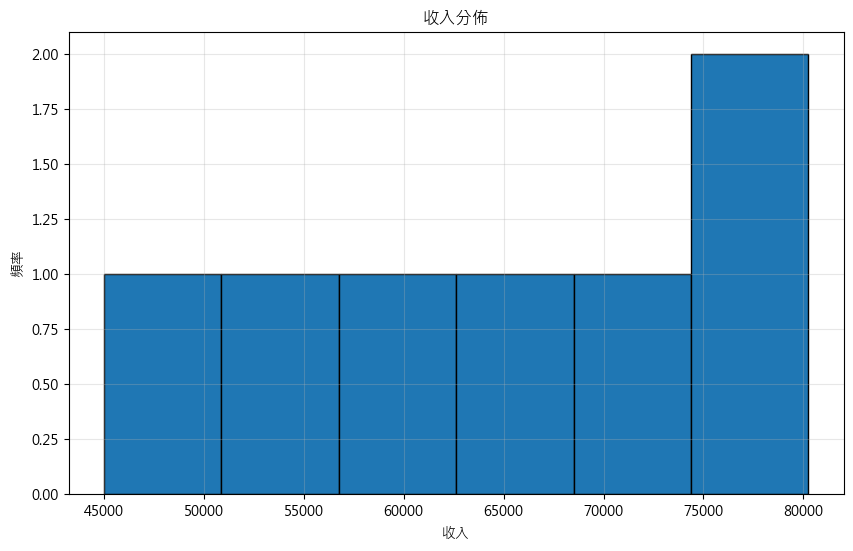

In [156]:
# 創建模擬的「髒」數據CSV文件
import tempfile

csv_content = """
id,name,age,income,join_date,status
1,Smith John,35,75000.00,2022-01-15,active
2,Johnson Alice,,62500,2022-01-20,active
3,Williams Bob,42,55000,2022-02-10,inactive
4,Brown Carol,,45000.75,2022-01-05,active
5,Davis Eric,38,80250.25,2022-02-15,active
6,Miller Fiona,45,68300,2022-03-01,inactive
7,Wilson George,,72100,2022-03-20,pending
"""


temp_csv = tempfile.NamedTemporaryFile(delete=False, suffix='.csv')
with open(temp_csv.name, 'w') as f:
    f.write(csv_content)

print(f"創建模擬CSV文件: {temp_csv.name}")

# 嘗試直接讀取數據
df_raw = pd.read_csv(temp_csv.name, skipinitialspace=True)
print("\n原始數據 (直接讀取):")
print(df_raw)
print("\n數據類型:")
print(df_raw.dtypes)

# 以更合適的方式讀取並處理數據
df_clean = pd.read_csv(temp_csv.name, skipinitialspace=True)

# 1. 處理名稱
df_clean['name'] = df_clean['name'].str.strip().str.replace('"', '')

# 2. 處理年齡 - 確保是整數
df_clean['age'] = pd.to_numeric(df_clean['age'], errors='coerce')

# 3. 處理收入 - 清理貨幣符號和千分位
df_clean['income'] = df_clean['income'].astype(str).str.replace('$', '').str.replace(',', '').str.replace('"', '')
df_clean['income'] = pd.to_numeric(df_clean['income'], errors='coerce')

# 4. 處理日期 - 統一格式
df_clean['join_date'] = pd.to_datetime(df_clean['join_date'], errors='coerce', format='mixed')

# 5. 處理狀態 - 統一大小寫並分類
df_clean['status'] = df_clean['status'].str.lower()
df_clean['status'] = df_clean['status'].astype('category')

print("\n清理後的數據:")
print(df_clean)
print("\n數據類型:")
print(df_clean.dtypes)

# 檢查缺失值
print("\n缺失值:")
print(df_clean.isna().sum())

# 填充缺失值
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
print("\n填充缺失年齡後:")
print(df_clean)

# 可視化收入分佈
plt.figure(figsize=(10, 6))
plt.hist(df_clean['income'].dropna(), bins=6, edgecolor='black')
plt.title('收入分佈')
plt.xlabel('收入')
plt.ylabel('頻率')
plt.grid(True, alpha=0.3)
plt.show()

# 最終清理好的數據
df_final = df_clean.copy()




### 8.7 數據型態轉換的實際應用案例：數據整合與標準化

In [157]:
# 模擬來自不同來源的數據
# 來源1: CSV格式的銷售數據
df1 = pd.DataFrame({
    'Date': ['2023-01-15', '2023-02-20', '2023-03-25'],
    'Product': ['A', 'B', 'C'],
    'Revenue': ['$1,200.50', '$950.25', '$1,500.75'],
    'Quantity': ['25', '18', '30']
})

# 來源2: JSON格式的產品數據
df2 = pd.DataFrame({
    'ProductID': ['A', 'B', 'C', 'D'],
    'Name': ['ProductA', 'ProductB', 'ProductC', 'ProductD'],
    'Price': [48.02, 52.79, 50.025, 65.5],
    'Category': ['Electronics', 'Home', 'Electronics', 'Clothing']
})

# 來源3: Excel格式的客戶數據
df3 = pd.DataFrame({
    'Date': ['15/01/2023', '20/02/2023', '25/03/2023'],
    'CustomerSegment': ['Premium', 'Standard', 'Premium'],
    'Region': ['North', 'South', 'West']
})

print("來源1 - 銷售數據 (CSV):")
print(df1)
print("\n來源2 - 產品數據 (JSON):")
print(df2)
print("\n來源3 - 客戶數據 (Excel):")
print(df3)

# 步驟1: 統一數據類型
# 轉換日期格式
df1['Date'] = pd.to_datetime(df1['Date'])
df3['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y')
print("\n統一日期格式後:")
print(f"df1['Date'] 型態: {df1['Date'].dtype}")
print(f"df3['Date'] 型態: {df3['Date'].dtype}")

# 轉換數值型態
df1['Revenue'] = df1['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)
df1['Quantity'] = df1['Quantity'].astype(int)
print("\n轉換數值後的銷售數據:")
print(df1)

# 步驟2: 合併數據
# 將產品數據與銷售數據合併
df_merged1 = pd.merge(df1, df2, left_on='Product', right_on='ProductID', how='left')
print("\n合併產品與銷售數據:")
print(df_merged1)

# 將客戶數據與合併後的數據再合併
df_final = pd.merge(df_merged1, df3, on='Date', how='left')
print("\n最終合併的數據:")
print(df_final)

# 步驟3: 數據檢查和清理
# 檢查是否有缺失值
print("\n檢查缺失值:")
print(df_final.isna().sum())

# 計算單價 (Revenue / Quantity)
df_final['UnitRevenue'] = df_final['Revenue'] / df_final['Quantity']
print("\n添加單價計算:")
print(df_final[['Product', 'Quantity', 'Revenue', 'UnitRevenue', 'Price']])

# 檢查單價與價格的差異
df_final['PriceDiff'] = df_final['UnitRevenue'] - df_final['Price']
print("\n單價與產品價格的差異:")
print(df_final[['Product', 'UnitRevenue', 'Price', 'PriceDiff']])

來源1 - 銷售數據 (CSV):
         Date Product    Revenue Quantity
0  2023-01-15       A  $1,200.50       25
1  2023-02-20       B    $950.25       18
2  2023-03-25       C  $1,500.75       30

來源2 - 產品數據 (JSON):
  ProductID      Name   Price     Category
0         A  ProductA  48.020  Electronics
1         B  ProductB  52.790         Home
2         C  ProductC  50.025  Electronics
3         D  ProductD  65.500     Clothing

來源3 - 客戶數據 (Excel):
         Date CustomerSegment Region
0  15/01/2023         Premium  North
1  20/02/2023        Standard  South
2  25/03/2023         Premium   West

統一日期格式後:
df1['Date'] 型態: datetime64[ns]
df3['Date'] 型態: datetime64[ns]

轉換數值後的銷售數據:
        Date Product  Revenue  Quantity
0 2023-01-15       A  1200.50        25
1 2023-02-20       B   950.25        18
2 2023-03-25       C  1500.75        30

合併產品與銷售數據:
        Date Product  Revenue  Quantity ProductID      Name   Price  \
0 2023-01-15       A  1200.50        25         A  ProductA  48.020   
1 2023-02-2


### 8.12 數據型態轉換的實際應用案例：數據清洗與預處理

In [158]:
# 創建包含雜亂文本的 DataFrame
df_messy = pd.DataFrame({
    'Text': [
        '  This is a sample text! With some punctuation. ',
        'ANOTHER TEXT WITH ALL CAPITALS.',
        'URL: https://example.com/page.html',
        'Multiple   spaces   and\ttabs\tin this text',
        'Email: user123@example.com #hashtag'
    ]
})
print("原始雜亂文本:")
print(df_messy)

# 基本清洗步驟
df_messy['Cleaned'] = df_messy['Text'].str.strip()  # 移除前後空白
df_messy['Cleaned'] = df_messy['Cleaned'].str.lower()  # 轉為小寫
df_messy['Cleaned'] = df_messy['Cleaned'].str.replace(r'[^\w\s]', '', regex=True)  # 移除標點符號
df_messy['Cleaned'] = df_messy['Cleaned'].str.replace(r'\s+', ' ', regex=True)  # 移除多餘空白

print("\n基本清洗後的文本:")
print(df_messy[['Text', 'Cleaned']])

# 移除URLs
df_messy['No_URLs'] = df_messy['Text'].str.replace(r'https?://\S+', '', regex=True)
print("\n移除URLs:")
print(df_messy[['Text', 'No_URLs']])

# 移除Email
df_messy['No_Emails'] = df_messy['Text'].str.replace(r'\S+@\S+', '', regex=True)
print("\n移除Emails:")
print(df_messy[['Text', 'No_Emails']])

# 移除標籤和主題標籤
df_messy['No_Tags'] = df_messy['Text'].str.replace(r'#\w+', '', regex=True)
print("\n移除標籤:")
print(df_messy[['Text', 'No_Tags']])

# 分詞
df_messy['Tokens'] = df_messy['Cleaned'].str.split()
print("\n分詞結果:")
print(df_messy[['Cleaned', 'Tokens']])

原始雜亂文本:
                                               Text
0    This is a sample text! With some punctuation. 
1                   ANOTHER TEXT WITH ALL CAPITALS.
2                URL: https://example.com/page.html
3       Multiple   spaces   and\ttabs\tin this text
4               Email: user123@example.com #hashtag

基本清洗後的文本:
                                               Text  \
0    This is a sample text! With some punctuation.    
1                   ANOTHER TEXT WITH ALL CAPITALS.   
2                URL: https://example.com/page.html   
3       Multiple   spaces   and\ttabs\tin this text   
4               Email: user123@example.com #hashtag   

                                       Cleaned  
0  this is a sample text with some punctuation  
1               another text with all capitals  
2                  url httpsexamplecompagehtml  
3        multiple spaces and tabs in this text  
4              email user123examplecom hashtag  

移除URLs:
                                   


**解說**：
- 文本數據處理通常包括標準化（大小寫統一）、清洗（移除標點符號、多餘空白）和標記化（分詞）
- 使用 `str.split()` 將文本切分為單詞列表，便於後續分析
- 詞頻統計是文本分析的基礎，可以從整體或單條文本的角度計算詞頻
- 文本清洗通常是數據分析流程的第一步，它為後續的特徵工程和分析奠定基礎
- Pandas 的字符串方法提供了高效的文本處理能力，搭配正則表達式能處理複雜的文本模式


## 🔑 8. 總結與最佳實踐

**學習要點**：
- 掌握數據類型轉換的基本原則和方法
- 了解各種特殊數據類型的處理技巧
- 熟悉日期時間和文本數據的高級處理方法
- 學習處理實際數據集中常見的數據類型問題

**應用場域**：
- 數據前處理與清洗工作流
- 數據整合與標準化過程
- 特徵工程與模型輸入準備
- 數據分析報告生成與格式化


1. **數據型態轉換原則**
   - 始終在進行計算前檢查數據類型
   - 優先使用 Pandas 內建的轉換函數 (`to_numeric`, `to_datetime` 等)
   - 處理錯誤時使用 `errors='coerce'` 轉換問題值為 NaN，而非直接失敗
   - 為大型數據集選擇適當的數據類型以節省內存（如 `category`, `int32`）

2. **數據清洗最佳實踐**
   - 數據導入後立即進行類型檢查和轉換，而非等到需要時
   - 對於文本數據，建立標準化的預處理流程
   - 使用 `info()` 和 `describe()` 方法了解數據概況
   - 記錄數據轉換過程，確保可複現性

3. **性能優化建議**
   - 使用類別型數據減少內存使用
   - 使用 `astype()` 批量轉換比逐行處理更高效
   - 考慮使用 `category` 型別處理有限值集合（如性別、國家）
   - 日期計算優先使用向量化操作，避免 apply 循環

4. **進階學習方向**
   - **探索性數據分析**：學習如何使用正確的數據類型進行高效 EDA
   - **數據轉換進階**：掌握更複雜的數據轉換技巧和函數
   - **大數據處理**：了解如何處理記憶體無法容納的大型數據集
   - **自定義數據類型**：學習如何擴展 Pandas 的數據類型系統